In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

# HOUSE PRICE

Data fields

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
KitchenAbvGr: Kitchens above grade
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
Acknowledgments

In [2]:
path = "/Users/akashsoni/Desktop/house/trainnoheader_house.csv"
train_file_path = sc.textFile(path)
data_count= train_file_path.count()

In [3]:
from pyspark.mllib.regression import LabeledPoint,LinearRegressionWithSGD
from pyspark.mllib.tree import DecisionTree
import numpy as np
import operator
import matplotlib.pyplot as plt

In [4]:
records = train_file_path.map(lambda x: x.split(","))

In [5]:
type_columns=[2,5,7,8,9,10,11,12,13,14,15,16,21,22,23,24,27,28,29,39,40,41,53,55,65,78,79]
type_columns_with_NA=[6,25,30,31,32,33,35,42,57,58,60,63,64,72,73,74]

In [6]:
number_columns=[1,4,17,18,19,20,34,36,37,38,43,44,45,46,47,48,49,50,51,52,54,56,61,62,66,67,68,69,70,71,75,76,77]
number_columns_with_NA=[3,26,59]
number_columns_with_many_zeros=[26,34,36,37,38,44,45,62,66,67,68,69,70,71,75]

In [7]:
saleprice_column=80

In [8]:
def getMapOfColumn(idx):
    return records.map(lambda fields:fields[idx]).distinct().zipWithIndex().collectAsMap()

In [9]:
def get_type_maps():
    type_maps={}
    for i in type_columns:
        type_maps[i]=getMapOfColumn(i)
    for i in type_columns_with_NA:
        type_maps[i]=getMapOfColumn(i)
    return type_maps

In [10]:
type_maps=get_type_maps()

In [11]:
print(type_maps)

{2: {'RL': 0, 'RH': 1, 'RM': 2, 'C (all)': 3, 'FV': 4}, 5: {'Pave': 0, 'Grvl': 1}, 7: {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}, 8: {'Bnk': 0, 'Low': 1, 'Lvl': 2, 'HLS': 3}, 9: {'NoSeWa': 0, 'AllPub': 1}, 10: {'FR2': 0, 'CulDSac': 1, 'Inside': 2, 'Corner': 3, 'FR3': 4}, 11: {'Gtl': 0, 'Mod': 1, 'Sev': 2}, 12: {'CollgCr': 0, 'Mitchel': 1, 'NWAmes': 2, 'NAmes': 3, 'MeadowV': 4, 'Edwards': 5, 'ClearCr': 6, 'NPkVill': 7, 'Blmngtn': 8, 'SWISU': 9, 'Veenker': 10, 'Crawfor': 11, 'NoRidge': 12, 'Somerst': 13, 'OldTown': 14, 'BrkSide': 15, 'Sawyer': 16, 'NridgHt': 17, 'SawyerW': 18, 'IDOTRR': 19, 'Timber': 20, 'Gilbert': 21, 'StoneBr': 22, 'BrDale': 23, 'Blueste': 24}, 13: {'Norm': 0, 'Feedr': 1, 'PosN': 2, 'Artery': 3, 'RRAe': 4, 'RRNn': 5, 'PosA': 6, 'RRAn': 7, 'RRNe': 8}, 14: {'Norm': 0, 'Artery': 1, 'RRNn': 2, 'Feedr': 3, 'PosN': 4, 'PosA': 5, 'RRAe': 6, 'RRAn': 7}, 15: {'1Fam': 0, 'Duplex': 1, 'TwnhsE': 2, '2fmCon': 3, 'Twnhs': 4}, 16: {'1.5Fin': 0, '1.5Unf': 1, 'SLvl': 2, '2.5Unf': 3, '2.5

In [12]:
def get_type_cnt(maps):
    return sum([len(maps[i]) for i in maps])

In [13]:
type_cnt=get_type_cnt(type_maps)
number_cnt=len(number_columns)
total=type_cnt+number_cnt

total_dt=len(type_columns)+len(type_columns_with_NA)+len(number_columns)

print ("Feature vector length for type features: %d" % type_cnt)
print ("Feature vector length for numerical features: %d" % number_cnt)
print ("Total feature vector length: %d" % total)
print ("Total_dt feature vector length: %d" % total_dt)

Feature vector length for type features: 268
Feature vector length for numerical features: 33
Total feature vector length: 301
Total_dt feature vector length: 76


In [14]:
def extract_features(fields):
    features=np.zeros(total)
    step=0
    for i in type_columns:
        features[step+ int(type_maps[i][fields[i]]) ]=1.0
        step=step+len(type_maps[i])
    for i in type_columns_with_NA:
        features[step+int(type_maps[i][fields[i]])]=1.0
        step=step+len(type_maps[i])
    for i in number_columns:
        features[step]=float(fields[i])
        step=step+1
    return features

In [15]:
def extract_features_dt(fields):
    features=np.zeros(total_dt)
    step=0
    for i in type_columns:
        features[step]=float(type_maps[i][fields[i]])
        step=step+1
    
    for i in type_columns_with_NA:
        features[step]=float(type_maps[i][fields[i]])
        step=step+1
    for i in number_columns:
        features[step]=float(fields[i])
        step=step+1
    return features

In [16]:
data=records.map(lambda fields: LabeledPoint(float(fields[saleprice_column]),extract_features(fields)))
data_dt=records.map(lambda fields: LabeledPoint(float(fields[saleprice_column]),extract_features_dt(fields)))

In [17]:
first_point = data.first()
#print ("Raw data: " + str(first_point[1:]))
print ("Label: " + str(first_point.label))
print ("Linear Model feature vector:\n" + str(first_point.features))
print ("Linear Model feature vector length: " + str(len(first_point.features)))

Label: 208500.0
Linear Model feature vector:
[1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [18]:
from pyspark.mllib.regression import LinearRegressionWithSGD

In [19]:
lrModel=LinearRegressionWithSGD.train(data, iterations=10, step=0.1, intercept=False)
true_vs_predicted=data.map(lambda p: (p.label, lrModel.predict(p.features)))

/Users/akashsoni/spark/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")


In [20]:
print ("Linear Model predictions: " + str(true_vs_predicted.take(5)))

Linear Model predictions: [(208500.0, -1.3111060925180484e+75), (181500.0, -1.4720767452081686e+75), (223500.0, -1.7050281430818638e+75), (140000.0, -1.4631365187530982e+75), (250000.0, -2.1369709269890862e+75)]


In [22]:
li=[]
for i in true_vs_predicted.collect():
    true,pred=i[0],i[1]
    val=(pred - true)**2
    li.append(val)
lenth=len(li)
su=sum(li)
mean=su/lenth
print ("Linear Model - Mean Squared Error: %2.4f" % mean)

Linear Model - Mean Squared Error: 4519283835876382689242228853370308019420839092654378420329959275965062173707428040253979807151535809132649831467864490762707227557576984928707873341440.0000


In [23]:
targets = records.map(lambda r: float(r[-1])).collect()

In [24]:
import pylab

In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


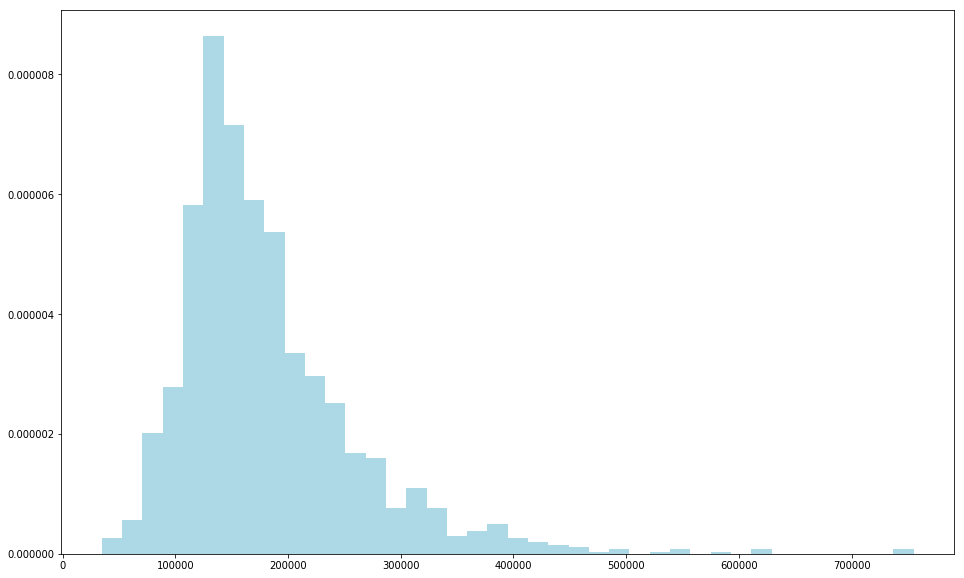

In [26]:
hist(targets, bins=40, color='lightblue', normed=True)

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(16, 10)

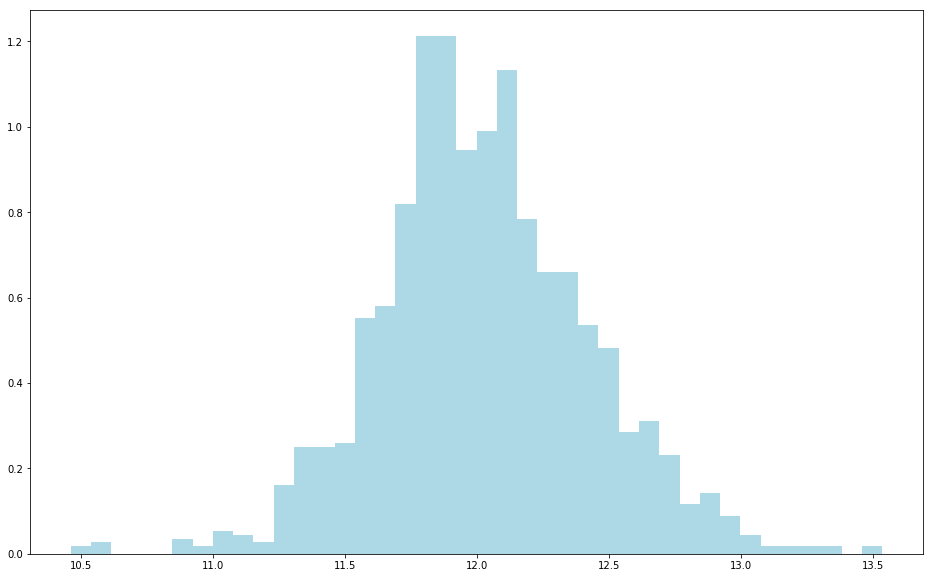

In [27]:
log_targets = records.map(lambda r: np.log(float(r[-1]))).collect()

hist(log_targets, bins=40, color='lightblue', normed=True)

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(16, 10)

In [28]:
data_log = data.map(lambda lp: LabeledPoint(np.log(lp.label), lp.features))


In [29]:
model_log = LinearRegressionWithSGD.train(data_log, iterations=10, step=0.1)

/Users/akashsoni/spark/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")


In [30]:
true_vs_predicted_log = data_log.map(lambda p: (np.exp(p.label), np.exp(model_log.predict(p.features))))

In [31]:
nn=[]
ab=[]
s_log=[]
for i in true_vs_predicted_log.collect():
    real,predict=i[0],i[1]
    value=(predict - real)**2
    value1=np.abs(predict - real)
    value2=(np.log(predict + 1) - np.log(real + 1))**2
    nn.append(value)
    ab.append(value1)
    s_log.append(value2)
value_len=len(nn)
print( value_len)
ss=sum(nn)
t=ss/value_len
ab_sum=sum(ab)
ab_mean=ab_sum/value_len
s_log_sum=sum(s_log)
s_log_mean=np.sqrt(s_log_sum/value_len)
print ("log - Mean Squared Error: %2.4f" % t)
print("log - Mean Absolue Error: %2.4f" % ab_mean)
print("Root Mean Squared Log Error: %2.4f" % s_log_mean)



1460
log - Mean Squared Error: 39039267707.7658
log - Mean Absolue Error: 180921.1959
Root Mean Squared Log Error: 12.0307


In [32]:
print ("Non log-transformed predictions:\n" + str(true_vs_predicted.take(3)))

print ("Log-transformed predictions:\n" + str(true_vs_predicted_log.take(3)))

Non log-transformed predictions:
[(208500.0, -1.3111060925180484e+75), (181500.0, -1.4720767452081686e+75), (223500.0, -1.7050281430818638e+75)]
Log-transformed predictions:
[(208500.00000000012, 0.0), (181499.99999999988, 0.0), (223500.0, 0.0)]


# Tuning model parameters

In [33]:
train, test = data.randomSplit([0.7, 0.3], seed=12345)

In [34]:
train_size=train.count()

In [35]:
test_size=test.count()

In [36]:
print ("Training data size: %d" % train_size)

Training data size: 1050


In [37]:
print ("Test data size: %d" % test_size)

Test data size: 410


In [38]:
print ("Train + Test size : %d" % (train_size + test_size))

Train + Test size : 1460


We can confirm that we now have two distinct datasets that add up to the original dataset in total:

Training data size: 1186

Test data size: 274

Total data size: 1460

Train + Test size : 1460

# The impact of parameter settings for linear models

In [39]:
def evaluate(train, test, iterations, step, regParam, regType, intercept):

    model = LinearRegressionWithSGD.train(train, iterations, step, regParam=regParam, regType=regType, intercept=intercept)

    tp = test.map(lambda p: (p.label, model.predict(p.features)))
    
    new_val=[]
    for i in tp.collect():
        actual=i[0]
        pred=i[1]
        va=(np.log(pred + 1) - np.log(actual + 1))**2
        new_val.append(va)
    lenth=len(new_val)
    s_new_val=sum(new_val)
    mean_new_val=s_new_val/lenth
    rmsle=np.sqrt(mean_new_val)
    return rmsle

# Iterations

In [40]:
params = [1, 5, 11, 15, 20, 50]

metrics = [evaluate(train, test, param, 0.1, 0.0, 'l2', False) for param in params]

print (params)

print (metrics)

/Users/akashsoni/spark/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


[1, 5, 11, 15, 20, 50]
[16.401492085322918, 81.34883033703413, 176.05369822746945, 238.23038626017032, nan, nan]


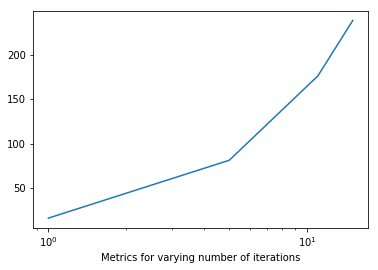

In [41]:
plot(params, metrics)

fig = matplotlib.pyplot.gcf()
pyplot.xlabel('Metrics for varying number of iterations')
pyplot.xscale('log')

# Step size

In [42]:
params = [0.1, 0.020, 0.25, 0.1, 1.0]

In [43]:
metrics = [evaluate(train, test, 10, param, 0.0, 'l2', False) for param in params]

/Users/akashsoni/spark/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [44]:
print (params)
print (metrics)

[0.1, 0.02, 0.25, 0.1, 1.0]
[nan, nan, nan, nan, nan]


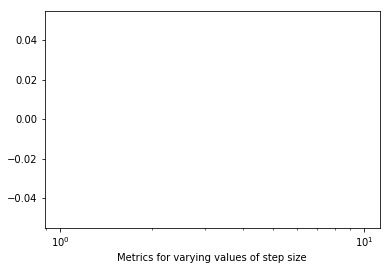

In [45]:
plot(params, metrics)

fig = matplotlib.pyplot.gcf()
pyplot.xlabel('Metrics for varying values of step size')
pyplot.xscale('log')

# L2 regularization

In [46]:
params = [0.0, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]

metrics = [evaluate(train, test, 10, 0.1, param, 'l2', False) for param in params]

print (params)

print (metrics)

/Users/akashsoni/spark/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


[0.0, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]
[nan, nan, nan, nan, nan, nan, nan]


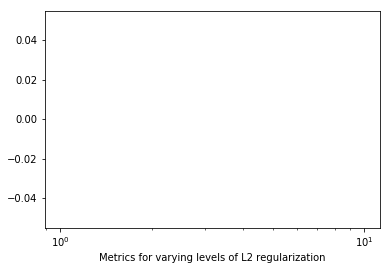

In [47]:
plot(params, metrics)

fig = matplotlib.pyplot.gcf()
pyplot.xlabel('Metrics for varying levels of L2 regularization')
pyplot.xscale('log')

# L1 regularization

In [48]:
params = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

metrics = [evaluate(train, test, 10, 0.1, param, 'l1', False) for param in params]

print (params)

print (metrics)

/Users/akashsoni/spark/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


[0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
[nan, nan, nan, nan, nan, nan, nan]


In [49]:
model_l1 = LinearRegressionWithSGD.train(train, 10, 0.1, regParam=1.0, regType='l1', intercept=False)

model_l1_10 = LinearRegressionWithSGD.train(train, 10, 0.1, regParam=10.0, regType='l1', intercept=False)

model_l1_100 = LinearRegressionWithSGD.train(train, 10, 0.1, regParam=100.0, regType='l1', intercept=False)

print ("L1 (1.0) number of zero weights: " + str(sum(model_l1.weights.array == 0)))

print ("L1 (10.0) number of zeros weights: " + str(sum(model_l1_10.weights.array == 0)))

print ("L1 (100.0) number of zeros weights: " + str(sum(model_l1_100.weights.array == 0)))

/Users/akashsoni/spark/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")


L1 (1.0) number of zero weights: 6
L1 (10.0) number of zeros weights: 6
L1 (100.0) number of zeros weights: 6


# Intercept

In [50]:
params = [False, True]

metrics = [evaluate(train, test, 10, 0.1, 1.0, 'l2', param) for param in params]

print (params)

print (metrics)

/Users/akashsoni/spark/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


[False, True]
[nan, nan]


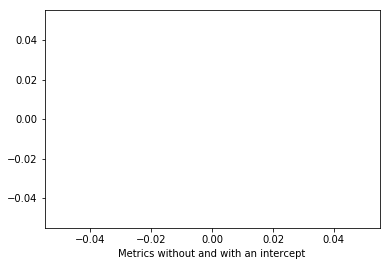

In [51]:
bar(params, metrics, color='lightblue')
pyplot.xlabel('Metrics without and with an intercept')
fig = matplotlib.pyplot.gcf()

# Decision Tree

In [52]:
def extract_features_dt(fields):
    features=np.zeros(total_dt)
    step=0
    for i in type_columns:
        features[step]=float(type_maps[i][fields[i]])
        step=step+1
    
    for i in type_columns_with_NA:
        features[step]=float(type_maps[i][fields[i]])
        step=step+1
    for i in number_columns:
        features[step]=float(fields[i])
        step=step+1
    return features

In [53]:
data_dt=records.map(lambda fields: LabeledPoint(float(fields[saleprice_column]),extract_features_dt(fields)))

In [54]:
print(data_dt.take(10))

[LabeledPoint(208500.0, [0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,0.0,3.0,5.0,0.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0]), LabeledPoint(181500.0, [0.0,0.0,0.0,2.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,6.0,2.0,3.0,6.0,6.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0]), LabeledPoint(223500.0, [0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,0.0,0.0,3.0,5.0,3.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1

In [55]:
first_point_dt = data_dt.first()
print ("Decision Tree feature vector: " + str(first_point_dt.features))
print ("Decision Tree feature vector length: " + str(len(first_point_dt.features)))

Decision Tree feature vector: [0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,0.0,3.0,5.0,0.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0]
Decision Tree feature vector length: 76


In [56]:
from pyspark.mllib.tree import DecisionTree

In [57]:
dt_model = DecisionTree.trainRegressor(data_dt,{})
preds = dt_model.predict(data_dt.map(lambda p: p.features))
actual = data.map(lambda p: p.label)
true_vs_predicted_dt = actual.zip(preds)
print ("Decision Tree predictions: " + str(true_vs_predicted_dt.take(5)))
print ("Decision Tree depth: " + str(dt_model.depth()))
print ("Decision Tree number of nodes: " + str(dt_model.numNodes()))

Decision Tree predictions: [(208500.0, 190334.33561643836), (181500.0, 147907.61375661375), (223500.0, 190334.33561643836), (140000.0, 156058.38888888888), (250000.0, 307760.1111111111)]
Decision Tree depth: 5
Decision Tree number of nodes: 63


In [62]:
nn=[]
ab=[]
s_log=[]
for i in true_vs_predicted_dt.collect():
    real,predict=i[0],i[1]
    value=(predict - real)**2
    value1=np.abs(predict - real)
    value2=(np.log(predict + 1) - np.log(real + 1))**2
    nn.append(value)
    ab.append(value1)
    s_log.append(value2)
value_len=len(nn)
print( value_len)
ss=sum(nn)
t=ss/value_len
ab_sum=sum(ab)
ab_mean=ab_sum/value_len
s_log_sum=sum(s_log)
s_log_mean=np.sqrt(s_log_sum/value_len)
print (" Mean Squared Error: %2.4f" % t)
print(" Mean Absolue Error: %2.4f" % ab_mean)
print("Root Mean Squared Log Error: %2.4f" % s_log_mean)
print ("Non log-transformed predictions:\n" + str(true_vs_predicted_dt.take(3)))



1460
log - Mean Squared Error: 875573280.8278
log - Mean Absolue Error: 21582.1548
Root Mean Squared Log Error: 0.1736
Non log-transformed predictions:
[(208500.0, 190334.33561643836), (181500.0, 147907.61375661375), (223500.0, 190334.33561643836)]


# Impact of training on log-transformed targets

In [419]:
data_dt_log = data_dt.map(lambda lp: LabeledPoint(np.log(lp.label), lp.features))

dt_model_log = DecisionTree.trainRegressor(data_dt_log,{})

preds_log = dt_model_log.predict(data_dt_log.map(lambda p: p.features))

actual_log = data_dt_log.map(lambda p: p.label)



In [420]:
new=actual_log.zip(preds_log)

In [421]:
new.take(5)

[(12.247694320220994, 12.147159998151047),
 (12.109010932687042, 11.890912291269839),
 (12.31716669303576, 12.147159998151047),
 (11.84939770159144, 11.949554245993713),
 (12.429216196844383, 12.515673640608348)]

In [422]:
true_vs_predicted_dt_log=[]
for val in new.collect():
    t,p=val[0],val[1]
    x=np.exp(t),np.exp(p)
    true_vs_predicted_dt_log.append(x)

In [423]:
nn=[]
ab=[]
s_log=[]
for i in true_vs_predicted_dt_log:
    real,predict=i[0],i[1]
    value=(predict - real)**2
    value1=np.abs(predict - real)
    value2=(np.log(predict + 1) - np.log(real + 1))**2
    nn.append(value)
    ab.append(value1)
    s_log.append(value2)
value_len=len(nn)
print( value_len)
ss=sum(nn)
t=ss/value_len
ab_sum=sum(ab)
ab_mean=ab_sum/value_len
s_log_sum=sum(s_log)
s_log_mean=np.sqrt(s_log_sum/value_len)
print ("log - Mean Squared Error: %2.4f" % t)
print("log - Mean Absolue Error: %2.4f" % ab_mean)
print("Root Mean Squared Log Error: %2.4f" % s_log_mean)
print ("Non log-transformed predictions:\n" + str(true_vs_predicted_dt.take(3)))



1460
log - Mean Squared Error: 1022580494.4448
log - Mean Absolue Error: 21569.5794
Root Mean Squared Log Error: 0.1610
Non log-transformed predictions:
[(208500.0, 190334.33561643836), (181500.0, 147907.61375661375), (223500.0, 190334.33561643836)]


# CROSS VALIDATION for the decision tree

In [424]:
train_dt, test_dt = data_dt.randomSplit([0.8, 0.2], seed=12345)

In [425]:
def evaluate_dt(train, test, maxDepth, maxBins):

    model = DecisionTree.trainRegressor(train, {}, impurity='variance', maxDepth=maxDepth, maxBins=maxBins)

    preds = model.predict(test.map(lambda p: p.features))

    actual = test.map(lambda p: p.label)

    tp = actual.zip(preds)
    new_val=[]
    for i in tp.collect():
        actual=i[0]
        pred=i[1]
        va=(np.log(pred + 1) - np.log(actual + 1))**2
        new_val.append(va)
    lenth=len(new_val)
    s_new_val=sum(new_val)
    mean_new_val=s_new_val/lenth
    rmsle=np.sqrt(mean_new_val)
    return rmsle
    

# Tree depth

[1, 2, 3, 4, 5, 10, 20]
[0.332943090421251, 0.2770328548990305, 0.25563569006835973, 0.24091676957589137, 0.212163652773227, 0.22209830650755852, 0.23462193469250922]


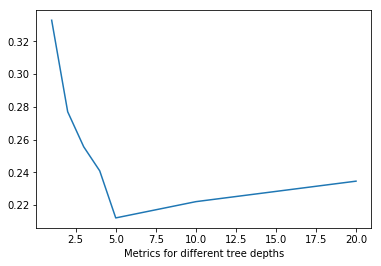

In [426]:
params = [1, 2, 3, 4, 5, 10, 20]

metrics = [evaluate_dt(train_dt, test_dt, param, 32) for param in params]

print (params)

print (metrics)

plot(params, metrics)
pyplot.xlabel('Metrics for different tree depths')
fig = matplotlib.pyplot.gcf()

# Maximum bins

[2, 4, 8, 16, 32, 64, 100]
[0.22578199542260993, 0.22626606160811255, 0.20380255431723798, 0.2076920210675261, 0.212163652773227, 0.21000218813883056, 0.2228581552832826]


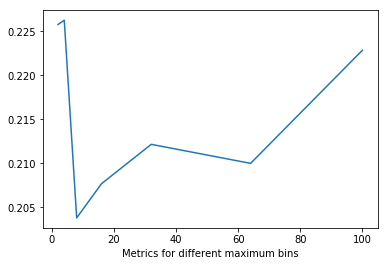

In [427]:
params = [2, 4, 8, 16, 32, 64, 100]

metrics = [evaluate_dt(train_dt, test_dt, 5, param) for param in params]

print (params)

print (metrics)

plot(params, metrics)
pyplot.xlabel('Metrics for different maximum bins')
fig = matplotlib.pyplot.gcf()

# Gradient BOOSTED TREE

In [428]:
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel



In [432]:
def extract_label(record):
    return float(record[-1])

In [433]:
data_gbt = records.map(lambda r: LabeledPoint(extract_label(r),extract_features_dt(r)))

In [434]:
(trainingData, testData) = data_gbt.randomSplit([0.7, 0.3])

In [435]:
model = GradientBoostedTrees.trainRegressor(trainingData,
                                            categoricalFeaturesInfo={}, numIterations=3)
preds = model.predict(testData.map(lambda p: p.features))
actual = testData.map(lambda p: p.label)
true_vs_predicted_GBT = actual.zip(preds)
print ("Gradient BOOSTED predictions: " + str(true_vs_predicted_GBT.take(5)))



Gradient BOOSTED predictions: [(181500.0, 127847.35832584045), (140000.0, 183976.10864163504), (250000.0, 324797.79900948657), (345000.0, 547996.9240094866), (144000.0, 123953.85321554006)]


In [436]:
nn=[]
ab=[]
s_log=[]
for i in true_vs_predicted_GBT.collect():
    real,predict=i[0],i[1]
    value=(predict - real)**2
    value1=np.abs(predict - real)
    value2=(np.log(predict + 1) - np.log(real + 1))**2
    nn.append(value)
    ab.append(value1)
    s_log.append(value2)
value_len=len(nn)
print( value_len)
ss=sum(nn)
t=ss/value_len
ab_sum=sum(ab)
ab_mean=ab_sum/value_len
s_log_sum=sum(s_log)

s_log_mean=np.sqrt(s_log_sum/value_len)
print ("log - Mean Squared Error: %2.4f" % t)
print("log - Mean Absolue Error: %2.4f" % ab_mean)
print("Root Mean Squared Log Error: %2.4f" % s_log_mean)

434
log - Mean Squared Error: 1672990971.7982
log - Mean Absolue Error: 29896.6269
Root Mean Squared Log Error: 0.2214


In [437]:
def evaluate_dt(trainingData,categoricalFeaturesInfo, loss, numIterations, maxDepth, maxBins):

    model = GradientBoostedTrees.trainRegressor(trainingData,categoricalFeaturesInfo, loss,numIterations,maxDepth=maxDepth, maxBins=maxBins)

    preds = model.predict(testData.map(lambda p: p.features))

    actual = testData.map(lambda p: p.label)

    tp = actual.zip(preds)
    new_val=[]
    for i in tp.collect():
        actual=i[0]
        pred=i[1]
        va=(np.log(pred + 1) - np.log(actual + 1))**2
        new_val.append(va)
    lenth=len(new_val)
    s_new_val=sum(new_val)
    mean_new_val=s_new_val/lenth
    rmsle=np.sqrt(mean_new_val)
    return rmsle

# Gradient boost tree Iteration

[2, 4, 8, 16, 32, 64, 100]
[0.2386141864077769, 0.2386138186069994, 0.23861308300992806, 0.2386116118337204, 0.2386086695530455, 0.23860278527867587, 0.2385961659274254]


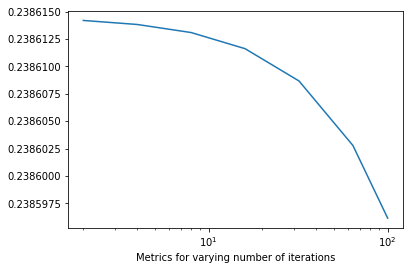

In [438]:
params = [2, 4, 8, 16, 32, 64, 100]

metrics = [evaluate_dt(trainingData, {},'leastAbsoluteError', param,3, 32) for param in params]

print (params)

print (metrics)

plot(params, metrics)

fig = matplotlib.pyplot.gcf()
pyplot.xlabel('Metrics for varying number of iterations')
pyplot.xscale('log')

[2, 4, 8, 16, 32, 64, 100]
[0.23920044017357264, 0.23490383719299326, 0.23808066238688508, 0.23630491645748977, 0.23861271521363445, 0.23596561433125265, 0.23763671694310903]


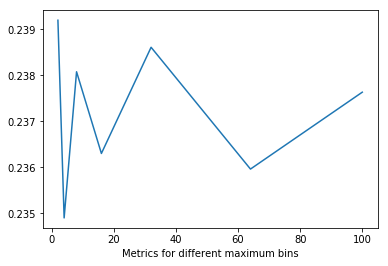

In [439]:
params = [2, 4, 8, 16, 32, 64, 100]

metrics = [evaluate_dt(trainingData, {},'leastAbsoluteError',10,3, param) for param in params]

print (params)

print (metrics)

plot(params, metrics)
pyplot.xlabel('Metrics for different maximum bins')
fig = matplotlib.pyplot.gcf()